<a href="https://colab.research.google.com/github/jorgenriquez/Redes-Neuronales-con-Python/blob/main/Convolutional_neural_networks_CNN_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementación de una CNN preentrenada en Python**

Aplicación de una CNN : Identificación de imágenes genéricas a partir del dataset ImageNet: diez millones de imágenes etiquetadas

 **ImageNet** es una base de datos de más de diez millones de imágenes etiquetadas creada por la organización del mismo nombre, y destinada a trabajos de investigación de visión por computador.**

## **Arquitectura de Red VGG16**

VGG16 es una arquitectura de red neuronal convolucional (CNN) desarrollada por el Grupo de Visión por Computadora (VGG) en la Universidad de Oxford. Es una de las arquitecturas CNN más influyentes y ampliamente utilizadas en la comunidad de aprendizaje profundo, especialmente en aplicaciones de visión por computadora.

### **Las características principales de VGG16 son:**

*   **Profundidad**: La red consta de 16 capas de convolución y agrupamiento (pooling),
lo que la convierte en una red relativamente profunda para su época (aunque hoy en día hay arquitecturas mucho más profundas).
*   **Estructura uniforme:** Todas las capas convolucionales en VGG16 utilizan filtros de tamaño 3x3 con un paso (stride) de 1 y relleno (padding) de 1, lo que da una estructura uniforme a la red.
*   **Capas de agrupamiento (pooling):** Después de cada par de capas convolucionales, hay una capa de MaxPooling de tamaño 2x2 con un paso de 2. Esto reduce progresivamente la resolución espacial de las características, lo que ayuda a reducir la cantidad de parámetros y a controlar el sobreajuste.
*   **Capas completamente conectadas al final:** Después de las capas convolucionales y de agrupamiento, hay tres capas completamente conectadas, seguidas de una capa de salida con función de activación softmax para la clasificación.
* **Uso de activación ReLU:** En lugar de utilizar funciones de activación como sigmoide o tangente hiperbólica, VGG16 utiliza la función de activación ReLU (Rectified Linear Unit) en todas sus capas convolucionales y completamente conectadas, excepto en la capa de salida.

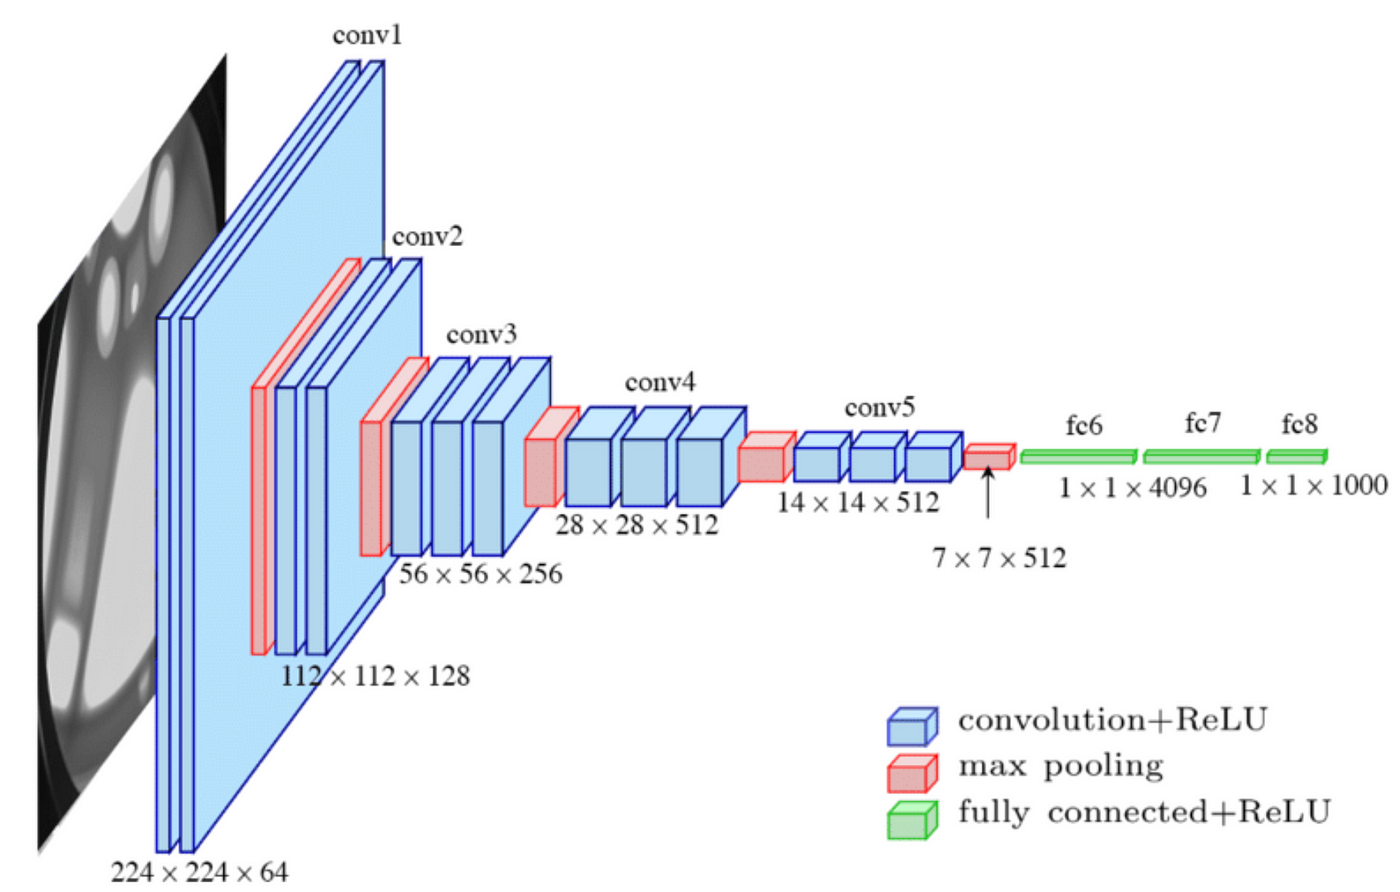

# **Librerias**

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# **Entrenamiento del modelo preentrenado VGG16**

In [ ]:
model = VGG16()


553467096/553467096 [==============================] - 7s 0us/step


### Importar de las 3 imágenes que hay que predecir

In [ ]:
# Importa las 3 images: avion de guerre de type reaper, loup, ballon de football.
from google.colab import files
from keras.preprocessing.image import load_img

# Sube los archivos al entorno de Google Colab
uploaded = files.upload()

# Carga las imágenes
img1 = load_img('reaper.png', target_size=(224, 224)) # Tamaño al que se redimensionará la imagen después de cargarla.
img2 = load_img('loup.png', target_size=(224, 224))
img3 = load_img('ballon.png', target_size=(224, 224))


Saving ballon.png to ballon (1).png
Saving loup.png to loup (1).png
Saving reaper.png to reaper (1).png


### Pretratamiento de las imágenes

In [ ]:
# Conversion image (matrice de pixels) en un numpy array
def preprocess(image) :
    image = img_to_array(image)

    # Redimensionnage
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    # Preprocessing
    image = preprocess_input(image)

    return image

# **Predicción del modelo**

In [ ]:
def pred_modele(image) :

    image = preprocess(image)
    # Prédiction
    y_pred = model.predict(image)

    # Conversion des probabilités en classe label
    label = decode_predictions(y_pred)  #se convierten las probabilidades de predicción (y_pred) en etiquetas de clase utilizando una función llamada decode_predictions

    # Affectation du label ayant la plus grande probabilité
    label = label[0][0] # selecciona la etiqueta con la probabilidad más alta de la predicción


    return ((label[1], label[2]*100)) # devuelve el nombre de la clase (label[1]) y la probabilidad correspondiente multiplicada por 100 (label[2]*100).

img=[img1,img2,img3]

# La parte pred_modele(img[i])[0] devuelve el nombre de la clase predicha, y pred_modele(img[i])[1] devuelve la probabilidad de esa clase.

for i in range(3) :
    print("Prédiction image",i+1,":",pred_modele (img[i])[0], 'avec une probabilité de',round(pred_modele (img[i])[1],2),'%')

1/1 [==============================] - 1s 1s/step
Prédiction image 1 : warplane avec une probabilité de 46.33 %
1/1 [==============================] - 1s 720ms/step
Prédiction image 2 : timber_wolf avec une probabilité de 95.64 %
1/1 [==============================] - 1s 583ms/step
Prédiction image 3 : soccer_ball avec une probabilité de 99.99 %


# **Visualización de las predicciones del modelo VGG16**

In [ ]:
import pandas as pd

# img = load_img('/Users/Bedoucha/Desktop/loup.jpeg', target_size=(224, 224))
img = load_img('loup.png', target_size=(224, 224))
img = preprocess(img)

# Prédiction
y_pred = model.predict(img)

# Création d'un DataFrame avec les 5 labels les plus probables
label_5_plus_probable = decode_predictions(y_pred)

l=[]
m=[]
for i in range(5) :
    l.append(label_5_plus_probable[0][i][1])
    m.append(round(label_5_plus_probable[0][i][2]*100,2))

df_5_plus_probable=pd.DataFrame({'Etiquette': l, 'Probabilité (%)' : m},index = list(range(1,6)))
df_5_plus_probable

1/1 [==============================] - 1s 606ms/step


,Etiquette,Probabilité (%)
1,timber_wolf,95.64
2,white_wolf,2.21
3,coyote,1.15
4,red_wolf,0.92
5,dingo,0.07


Por tanto VGG16 ha conseguido predecir con gran confianza (95,6 %) no solo que la imagen proporcionada en la entrada era un lobo, sino que ha ido un paso más allá y ha precisado su raza, es decir un lobo gris del Este (timber wolf). Impresionante, ¿no?

Por último, el principio de funcionamiento de una CNN es bastante fácil de comprender, pero paradójicamente, la implementación de un procedimiento como este para clasificar imágenes sigue siendo muy complejo debido al número considerable de parámetros que hay que definir: número, tamaño, desplazamiento de filtros, elección del método de pooling, elección del número de capas neuronales, número de neuronas por capas, etc.

Para paliar ese obstáculo, Python ofrece, a través del módulo de Torchvision, la posibilidad de explotar modelos de CNN preentrenados eficaces como VGG16, Resnet101, etc.